<a href="https://colab.research.google.com/github/MansMeg/BSDA/blob/main/colab_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bayesian Statistics and Data Analysis

In [ ]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [ ]:
?system

In [ ]:
# takes rougly 1m 
install.packages("rgl", repos = "http://cran.rstudio.com/")
install.packages("ConsRank", repos = "http://cran.rstudio.com/")
library("ConsRank")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘rlist’, ‘proxy’, ‘gtools’


Loading required package: rgl

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”

Attaching package: ‘ConsRank’


The following object is masked from ‘package:base’:

    labels




In [ ]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

In [ ]:
install.packages('ggmap')
install.packages('codetools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘RgoogleMaps’, ‘png’, ‘plyr’, ‘rjson’, ‘jpeg’, ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("ggmap")

Loading required package: ggplot2

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [ ]:
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Loading required package: StanHeaders

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



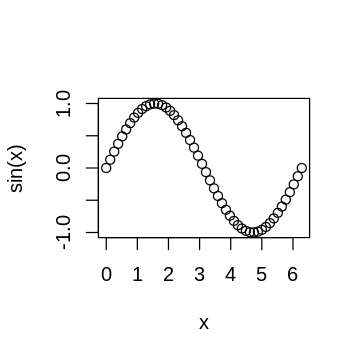

In [ ]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

In [ ]:
stanmodelcode <- "
data {
    int<lower=0> N; 
    real y[N];
}

parameters {
    real mu; 

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

Inference for Stan model: example.
8 chains, each with iter=2012; warmup=1006; thin=1; 
post-warmup draws per chain=1006, total post-warmup draws=8048.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu     0.28    0.00 0.22  -0.16   0.13   0.29   0.44   0.70  3357    1
lp__ -33.38    0.01 0.70 -35.35 -33.55 -33.12 -32.93 -32.88  3664    1

Samples were drawn using NUTS(diag_e) at Sun Jun 26 06:43:46 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



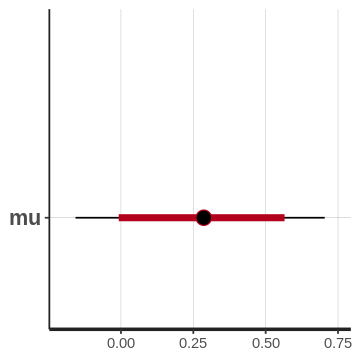

In [ ]:
plot(fit)

In [ ]:
y <- as.matrix(read.table('https://raw.github.com/wiki/stan-dev/rstan/rats.txt', header = TRUE))
x <- c(8, 15, 22, 29, 36)
xbar <- mean(x)
N <- nrow(y)
T <- ncol(y)
rats_fit <- stan(file = 'https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan')


Warning message in normalizePath(file):
“path[1]="https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan": No such file or directory”
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

 error in 'model3c7ab5fe58_rats' at line 6, column 2

  -------------------------------------------------

     4:   int<lower=0> N;

     5:   int<lower=0> T;

     6:   array[T] real x;

         ^

     7:   array[N, T] real y;

  -------------------------------------------------



PARSER EXPECTED: <one of the following:

  a variable declaration, beginning with type,

      (int, real, vector, row_vector, matrix, unit_vector,

       simplex, ordered, positive_ordered,

       corr_matrix, cov_matrix,

       cholesky_corr, cholesky_cov

  or '}' to close variable declarations>



ERROR: ignored

In [ ]:
rats_fit

In [ ]:
plot(rats_fit)

In [ ]:
## load APA data set, full version
data(APAFULL)
## Emond and Mason Branch-and-Bound algorithm.
## If the number of object is higher than 20, EMCons function may work for several minutes.
## Use either QuickCons, DECOR, FASTcons or FASTDECOR instead
CR=EMCons(APAFULL)

In [ ]:
TR=tabulaterows(APAFULL)
CR2=FASTcons(TR$X,TR$Wk,maxiter=5)
CR3=QuickCons(TR$X,TR$Wk)
CR4=DECOR(TR$X,TR$Wk)
#####################################
### load sports data set
#data(sports)
### FAST algorithm
#CR=FASTcons(sports,maxiter=10)
#####################################
#######################################
### load Emond and Mason data set
#data(EMD)
### matrix X contains rankings
#X=EMD[,1:15]
### vector Wk contains frequencies
#Wk=EMD[,16]
### QUICK algorithm
#CR=QuickCons(X,Wk)
#######################################

In [ ]:
data(BU)
polyplot(BU[,1:3],Wk=BU[,4])